In [41]:
!pip install keras-rectified-adam

In [42]:
import keras
import tqdm
from sklearn.model_selection import LeaveOneOut, KFold
from pydotplus import graphviz
from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import model_to_dot
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline
from keras import models
from keras.models import Sequential, Model
from keras.losses import binary_crossentropy
from keras import layers
from keras.layers import Dense, Input, concatenate
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from keras_radam import RAdam

In [43]:
seed_value= 0

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [44]:
#dadosgerais
df = pd.read_csv('https://docs.google.com/uc?id=1XFRaJxVx--GwwS0payN2VdHeSe-RNU8s')

#dadosnegativod
#df = pd.read_csv('https://docs.google.com/uc?id=1mbfgHbb9x9I_6LqXvJ5pvumucnltRuat')
df



,male(x),parent(y_x),female(x),parent(x_y),female(y),male(y),parent(Y_Z),male(Z),parent(Z_Y),female(Z),parent(Z_W),male(W),h(x)
0,1,0,0,1,1,0,0,0,0,0,0,0,1
1,1,0,0,1,1,0,1,1,0,0,0,0,1
2,1,0,0,1,1,0,0,0,1,1,0,0,1
3,1,0,0,1,1,0,1,1,0,0,0,0,1
4,1,0,0,1,1,0,1,0,0,1,0,0,1
5,1,0,0,1,1,0,0,1,1,0,0,0,1
6,1,0,0,1,1,0,1,1,1,0,1,1,1
7,1,0,0,1,1,0,1,0,0,1,0,0,1
8,1,0,0,1,1,0,1,1,1,0,0,1,1
9,1,0,0,1,1,0,0,0,0,0,0,1,1


In [45]:
y_train = df['h(x)']

X_train = df.drop('h(x)', axis=1)

y_train

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
Name: h(x), dtype: int64

In [46]:
x = np.asarray(X_train).astype('float32')
x

array([[1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.],
       [1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.],
       [1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
       [1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1.],
       [1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1.],
       [0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 1., 1., 0.,

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y_train,test_size=0.5,random_state=20)

In [48]:
#criando modelo de rede neural simples
network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=(12,)))
network.add(layers.Dense(1, activation='sigmoid'))
network.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                208       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


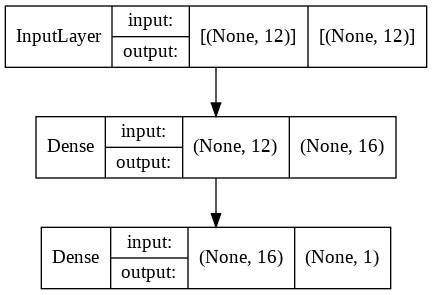

In [49]:
plot_model(network, show_shapes=True, show_layer_names=False)

In [50]:
network.compile(optimizer= 'adam', 
                loss='binary_crossentropy', 
                metrics=['accuracy','mse','Recall','Precision','AUC'])
H = network.fit(X_train, Y_train, epochs=50,validation_data =(X_test,Y_test),batch_size=1)

Epoch 1/50
24/24 [==============================] - 2s 26ms/step - loss: 0.8729 - accuracy: 0.2917 - mse: 0.3326 - recall: 0.3636 - precision: 0.2857 - auc: 0.2098 - val_loss: 0.7612 - val_accuracy: 0.4583 - val_mse: 0.2820 - val_recall: 0.5385 - val_precision: 0.5000 - val_auc: 0.4126
Epoch 2/50
24/24 [==============================] - 0s 6ms/step - loss: 0.8244 - accuracy: 0.4583 - mse: 0.3107 - recall: 0.5455 - precision: 0.4286 - auc: 0.3112 - val_loss: 0.7377 - val_accuracy: 0.4583 - val_mse: 0.2711 - val_recall: 0.5385 - val_precision: 0.5000 - val_auc: 0.4476
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 0.7837 - accuracy: 0.5000 - mse: 0.2923 - recall: 0.6364 - precision: 0.4667 - auc: 0.3846 - val_loss: 0.7180 - val_accuracy: 0.5000 - val_mse: 0.2618 - val_recall: 0.6154 - val_precision: 0.5333 - val_auc: 0.4825
Epoch 4/50
24/24 [==============================] - 0s 6ms/step - loss: 0.7498 - accuracy: 0.5833 - mse: 0.2762 - recall: 0.6364 - precision:

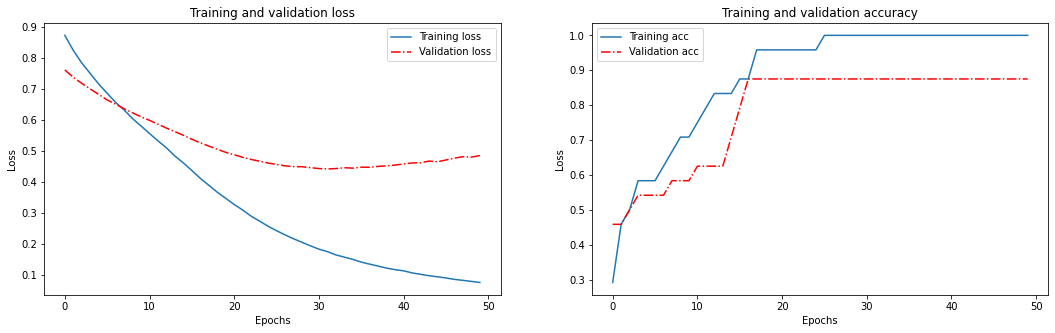

In [51]:
import matplotlib.pyplot as plt
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
epochs = range(0, 50)
loss = H.history['loss']
val_loss = H.history['val_loss']
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, '-.r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, '-.r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

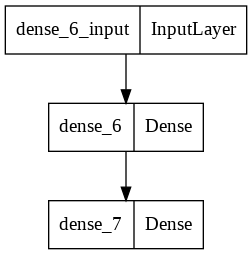

In [52]:
plot_model(network, show_shapes=False, show_layer_names=True)